In [ ]:
### EDA-анализ базы данных токсинов и их мишеней.
## ВВЕДЕНИЕ
# Целью работы с базой данных является выявления закономерностей между токсикологическими свойствами веществ и характеристиками их молекул.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Основной анализ
# Загрузка и чтение файла
file_id = "1i_H46ci0vi-B17v8UKIGfpQeGRpaa2uI"
file_url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(file_url)

In [12]:
## Оценка структуры данных
print("Размер датасета:", df.shape)
print("Типы данных:", df.types)
df.head(5)
df.tail(10)

Размер датасета: (3915, 58)
Типы данных: 0       [{'id': 1, 'type_name': 'Inorganic Compound', ...
1       [{'id': 1, 'type_name': 'Inorganic Compound', ...
2       [{'id': 1, 'type_name': 'Inorganic Compound', ...
3       [{'id': 7, 'type_name': 'Organic Compound', 'c...
4       [{'id': 7, 'type_name': 'Organic Compound', 'c...
                              ...                        
3910    [{'id': 1, 'type_name': 'Inorganic Compound', ...
3911                                                   []
3912                                                   []
3913                                                   []
3914                                                   []
Name: types, Length: 3915, dtype: object


,Unnamed: 0,id,title,common_name,description,cas,pubchem_id,chemical_formula,weight,appearance,...,chembl_id,chemspider_id,biodb_id,synthesis_reference,structure_image_caption,synonyms_list,types,cellular_locations,tissues,pathways
3905,3668,5054,T3D4995,"22,23-dihydroavermectin b1a","22,23-dihydroavermectin b1a is a component of ...",71827-03-7,6440492,C48H74O14,NaN,White powder,...,CHEMBL1200633,24605910,NaN,"<p>Shuet-Hing L. Chiu, Josephine R. Carlin, Ra...",NaN,"22,23-Dihydroavermectin b1a\r\n5-O-Demethyl-22...","[{'id': 82, 'type_name': 'Drug', 'created_at':...","[{'id': 149, 'name': 'Apical Membrane', 'creat...",[],[]
3906,3669,5055,T3D4996,"22,23-dihydroavermectin b1b","22,23-dihydroavermectin b1b is a component of ...",70209-81-3,6436163,C47H72O14,NaN,White powder,...,CHEMBL1200633,24605910,NaN,"<p>Shuet-Hing L. Chiu, Josephine R. Carlin, Ra...",NaN,"22,23-Dihydroavermectin b1b\r\nAscapil\r\nAver...","[{'id': 82, 'type_name': 'Drug', 'created_at':...","[{'id': 149, 'name': 'Apical Membrane', 'creat...",[],[]
3907,3670,5056,T3D4997,Carbon-14,"Carbon-14, 14C, or radiocarbon, is a radioacti...",14762-75-5,26873,CH4,NaN,NaN,...,NaN,25031,NaN,NaN,NaN,NaN,"[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 48, 'name': 'Cell surface', 'created_a...",[],"[{'id': 1121, 'name': 'Carbon Metabolism', 'sm..."
3908,3671,5057,T3D4998,Sulfur-35,Sulfur-35 is a radioactive isotope of sulfur.,15117-53-0,61783,H2S,NaN,NaN,...,NaN,55670,NaN,NaN,NaN,NaN,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 27, 'name': 'Cell junction', 'created_...",[],"[{'id': 855, 'name': 'Sulfur metabolism', 'smp..."
3909,3672,5058,T3D4999,Succinyl acetoacetate,Succinylacetoacetate is an intermediate that a...,65115-74-4,NaN,C8H10O6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[{'id': 334, 'type_name': 'Metabolite', 'creat...","[{'id': 35, 'name': 'Cytoskeleton', 'created_a...",[],"[{'id': 770, 'name': 'Insulin secretion', 'smp..."
3910,3673,5059,T3D5000,Sulfuric acid,Sulfuric acid is a highly corrosive strong min...,7664-93-9,1118,H2O4S,NaN,"Clear, colorless, odorless liquid. Sometimes, ...",...,CHEMBL572964,1086,NaN,NaN,NaN,Sulfurate\r\nSulphurate\r\nSulphuric acid\r\n[...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 48, 'name': 'Cell surface', 'created_a...",[],"[{'id': 1106, 'name': 'Phenothiazines', 'smpdb..."
3911,3674,5060,T3D5001,Succinic acid semialdehyde,Succinic acid semialdehyde (or succinate semia...,692-29-5,NaN,C4H6O3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[]
3912,3675,5061,T3D5002,L-Dopachrome,Dopachrome is a cyclization product of L-DOPA ...,89762-39-0,NaN,C9H7NO4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[]
3913,3676,5062,T3D5003,Benzoquinoneacetic acid,Benzoquinoneacetic acid (BQA) is an oxidized f...,10275-07-7,NaN,C8H6O4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[]
3914,3677,5063,T3D5004,Quinolacetic acid,Quinolacetic acid is a by-product of the parti...,55604-87-0,NaN,C8H8O4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[]


In [23]:
# Оценка полноты и целостности данных
print("Количество отсутствующих значений:", df.isnull().sum())
missing = df.isnull().sum().sort_values(ascending = False) # Переменная, в которой записано количество пропусков в каждом столбце
missing_percent = (missing / len(df) * 100).round(1)
print("Определение процента пропусков в каждом столбце:\n", missing_percent)
print("\nОбщее количество пропусков:", missing.sum())
duplicates = df.duplicated().sum()
print("Количество дублирующихся строк:", duplicates)
print("""
Выводы:
1. У значительной части столбцов есть пропуски, особенно в structure_image_caption, что не является значимым для анализа, и столбцах, содержащих идентификаторы веществ из внешних баз.
2. Базовые поля необходимые для анализа содержат меньше пропусков и пригодны для анализа.
3. Дублирующиеся строки в датасете отсутствуют.
""")

Количество отсутствующих значений: Unnamed: 0                    3
id                          131
title                       186
common_name                  74
description                  97
cas                         261
pubchem_id                  362
chemical_formula            288
weight                     1316
appearance                  287
melting_point              1990
boiling_point              3350
solubility                 2369
route_of_exposure           861
mechanism_of_toxicity       688
metabolism                  915
toxicity                   2794
lethaldose                 3466
carcinogenicity             282
use_source                  922
min_risk_level             2693
health_effects             1067
symptoms                   1040
treatment                  1544
created_at                  248
updated_at                  255
wikipedia                  2739
uniprot_id                 3622
kegg_compound_id           2472
omim_id                    3691
chebi


График распределения:


state
Solid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2890
Liquid                                                                                                             

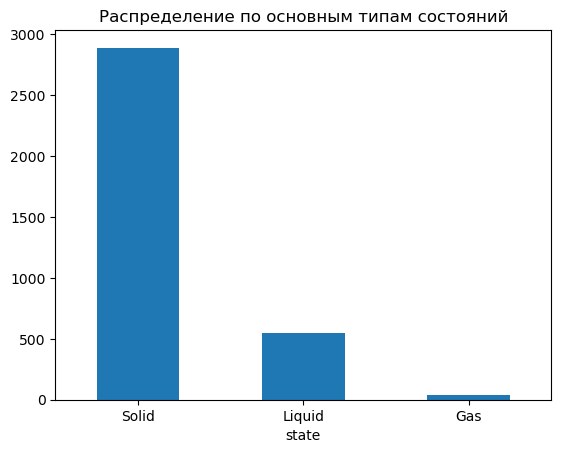


График распределения:


origin
Exogenous                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

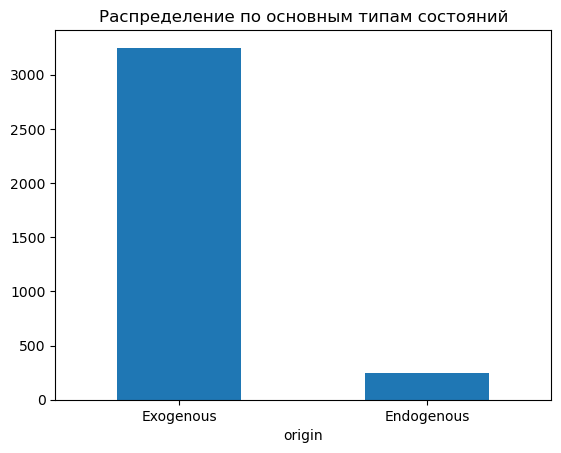


Выводы:
1. Большинство токсинов имеют экзогенное происхождение.
2. По состоянию преобладают твердые и жидкие токсины.



In [32]:
## Оценка выбросов и аномалий
cat_cols = ['state', 'origin']

for col in cat_cols:
    print("\nГрафик распределения:")
    display(df[col].value_counts())

    if col == 'state':
        allowed = ['Solid', 'Liquid', 'Gas']
    elif col == 'origin':
        allowed = ['Exogenous', 'Endogenous']
    else:
        allowed = df[col].unique()

    filtered = df[df[col].isin(allowed)]

    filtered[col].value_counts().plot(
        kind='bar',
        title=f"Распределение по основным типам состояний"
    )
    plt.xticks(rotation=0)
    plt.show()

print("""
Выводы:
1. Большинство токсинов имеют экзогенное происхождение.
2. По состоянию преобладают твердые и жидкие токсины.
""")


Статистика по числовым признакам:


,moldb_average_mass,moldb_mono_mass,logp
count,3376.000000,3372.000000,603.000000
mean,299.824120,299.333362,1.943242
std,197.229983,196.588186,2.523864
min,-0.640000,6.032099,-13.200000
25%,178.260325,179.069685,0.390000
50%,271.527000,270.635367,2.120000
75%,361.980625,361.843825,3.560000
max,3425.856000,3423.581083,10.000000



 moldb_average_mass: 168 выбросов (из 3915)

 moldb_mono_mass: 162 выбросов (из 3915)

 logp: 8 выбросов (из 3915)


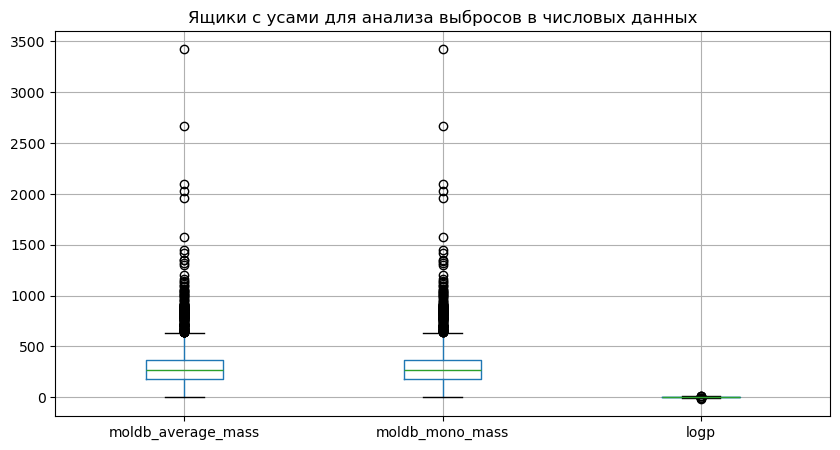

In [34]:
## Оценка выбросов и аномалий
numeric_cols = ['moldb_average_mass', 'moldb_mono_mass', 'logp']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nСтатистика по числовым признакам:")
display(df[numeric_cols].describe())

# Проверка выбросов с помощью IQR
for col in numeric_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        print(f"\n {col}: {len(outliers)} выбросов (из {len(df)})")

df.boxplot(column=numeric_cols, figsize=(10,5))
plt.title("Ящики с усами для анализа выбросов в числовых данных")
plt.show()

print("""
Выводы:
1. Молекулярные массы токсинов сконцентрированы в узком диапазоне, что говорит об общей однородности датафрейма по этому признаку. Немногочисленным выбросам, вероятно, соответствуют токсины с атипичной структурой.
2. Липофильность (logP) указана только для части соединений, поэтому этот показатель нельзя использовать для анализа всей выборки.
""")

In [43]:
## Метрики качества данных
# Используем две основные метрики качества данных
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
completeness = round(1 - (total_missing / total_cells), 3)

print("Completeness (полнота данных):", completeness, "(в норме ≥ 0.98)")
if completeness >= 0.98:
    print("Полнота данных является нормальной.")
else:
    print("Имеется значительное количество пропусков данных.")


duplicate_count = df.duplicated().sum()
uniqueness = round(1 - (duplicate_count / len(df)), 3)

print(" Uniqueness (уникальность данных):", uniqueness)
if uniqueness == 1.0:
    print("Все записи уникальны.")
else:
    print("Обнаружено {duplicate_count} дубликатов из {len(df)} строк.")

print("""
Выводы:
Проведена оценка качества данных по двум основным метрикам.
1. Полнота данных не является удовлетворительной, требуется дальнейшая работа с датафреймом и устранением пропусков.
2. Все записи в таблице данных уникальны, что является хорошим показателем.
""")


Completeness (полнота данных): 0.623 (в норме ≥ 0.98)
Имеется значительное количество пропусков данных.
 Uniqueness (уникальность данных): 1.0
Все записи уникальны.

Выводы:
Проведена оценка качества данных по двум основным метрикам.
1. Полнота данных не является удовлетворительной, требуется дальнейшая работа с датафреймом и устранением пропусков.
2. Все записи в таблице данных уникальны, что является хорошим показателем. 



In [44]:
## Заключение
# В ходе проведённого EDA-анализа данных оценивалась структура, полнота и качество данных в датафрейме токсинов и их мишеней. Большая часть данных является уникальной, но полнота данных находится на низком уровне и требует доработки. Распределения числовых параметров в целом стабильные, с небольшим числом выбросов.